<a href="https://colab.research.google.com/github/dayoungcho/CAU_ML4AI/blob/main/%EC%97%90%EB%A8%B8_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 초기 설정

In [ ]:
import os
import random
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
pd.set_option('display.max_columns', None)

def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42)

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 15 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 7s (1,394 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120899 files and dire

In [ ]:
plt.rc('font', family='NanumBarunGothic')
%matplotlib inline

## 전처리

### 외부 데이터

In [ ]:
light_df = pd.read_csv('drive/MyDrive/ai4ml/open/external_open/대구 보안등 정보.csv', encoding='cp949')[['설치개수', '소재지지번주소']]

location_pattern = r'(\S+) (\S+) (\S+) (\S+)'

light_df[['도시', '구', '동', '번지']] = light_df['소재지지번주소'].str.extract(location_pattern)
light_df = light_df.drop(columns=['소재지지번주소', '번지'])

light_df = light_df.groupby(['도시', '구', '동']).sum().reset_index()
light_df.reset_index(inplace=True, drop=True)
light_df

,도시,구,동,설치개수
0,대구광역시,남구,대명동,5377
1,대구광역시,남구,봉덕동,1424
2,대구광역시,남구,이천동,556
3,대구광역시,달서구,갈산동,349
4,대구광역시,달서구,감삼동,932
...,...,...,...,...
223,대구광역시,중구,태평로2가,38
224,대구광역시,중구,태평로3가,47
225,대구광역시,중구,포정동,18
226,대구광역시,중구,향촌동,28


In [ ]:
child_area_df = pd.read_csv('drive/MyDrive/ai4ml/open/external_open/대구 어린이 보호 구역 정보.csv', encoding='cp949').drop_duplicates()[['소재지지번주소']]
child_area_df['cnt'] = 1

location_pattern = r'(\S+) (\S+) (\S+) (\S+)'

child_area_df[['도시', '구', '동', '번지']] = child_area_df['소재지지번주소'].str.extract(location_pattern)
child_area_df = child_area_df.drop(columns=['소재지지번주소', '번지'])

child_area_df = child_area_df.groupby(['도시', '구', '동']).sum().reset_index()
child_area_df.reset_index(inplace=True, drop=True)
child_area_df
# cnt: 동 내에 cctv 설치된 구역 수(?)
# 동별 설치 구역 수 vs 동별 설치 대수 중에 뭘 하면 좋을까요

,도시,구,동,cnt
0,대구광역시,남구,대명동,26
1,대구광역시,남구,봉덕동,8
2,대구광역시,남구,이천동,6
3,대구광역시,달성군,가창면,4
4,대구광역시,달성군,구지면,3
...,...,...,...,...
66,대구광역시,중구,봉산동,2
67,대구광역시,중구,삼덕동2가,1
68,대구광역시,중구,삼덕동3가,1
69,대구광역시,중구,서문로1가,1


In [ ]:
parking_df = pd.read_csv('drive/MyDrive/ai4ml/open/external_open/대구 주차장 정보.csv', encoding='cp949')[['소재지지번주소', '급지구분']]
parking_df = pd.get_dummies(parking_df, columns=['급지구분'])

location_pattern = r'(\S+) (\S+) (\S+) (\S+)'

parking_df[['도시', '구', '동', '번지']] = parking_df['소재지지번주소'].str.extract(location_pattern)
parking_df = parking_df.drop(columns=['소재지지번주소', '번지'])

parking_df = parking_df.groupby(['도시', '구', '동']).sum().reset_index()
parking_df.reset_index(inplace=True, drop=True)
parking_df

# 급지구분1/2/3: 동별 급지별 주차장 개수
# 동별 주차장 구획수 vs 동별 급지별 주차장 개수 중에 뭘 하면 좋을까요
# 운영 요일(주말 운영 여부)도 고려하면 조을듯

,도시,구,동,급지구분_1,급지구분_2,급지구분_3
0,대구광역시,남구,대명동,20,1,0
1,대구광역시,남구,봉덕동,9,3,0
2,대구광역시,남구,이천동,3,0,0
3,대구광역시,달서구,갈산동,0,0,4
4,대구광역시,달서구,감삼동,0,1,3
...,...,...,...,...,...,...
131,대구광역시,중구,태평로2가,5,0,0
132,대구광역시,중구,태평로3가,1,0,0
133,대구광역시,중구,포정동,4,0,0
134,대구광역시,중구,향촌동,2,0,0


In [ ]:
observ = pd.read_csv('drive/MyDrive/ai4ml/open/external_open/대구 주차장 정보.csv', encoding='cp949')
observ['운영요일']

0      평일+토요일+공휴일
1      평일+토요일+공휴일
2      평일+토요일+공휴일
3      평일+토요일+공휴일
4      평일+토요일+공휴일
          ...    
866        평일+토요일
867        평일+토요일
868        평일+토요일
869        평일+토요일
870        평일+토요일
Name: 운영요일, Length: 871, dtype: object

In [ ]:
cctv_df = pd.read_csv('drive/MyDrive/ai4ml/open/external_open/대구 CCTV 정보.csv', encoding='cp949')[['소재지지번주소']]
cctv_df['cnt'] = 1
location_pattern = r'(\S+) (\S+) (\S+) (\S+)'
cctv_df[['도시', '구', '동', '번지']] = cctv_df['소재지지번주소'].str.extract(location_pattern)
cctv_df = cctv_df.drop(columns=['소재지지번주소', '번지'])

cctv_df = cctv_df.groupby([ '구', '동']).sum().reset_index()
cctv_df['도시'] = '대구광역시'
cctv_df.reset_index(inplace=True, drop=True)

cctv_df = cctv_df[['도시','구','동','cnt']]
cctv_df

# cnt: 동별 cctv 개수

,도시,구,동,cnt
0,대구광역시,가창면,삼산리,1
1,대구광역시,군위군,군위읍,3
2,대구광역시,군위군,부계면,4
3,대구광역시,군위군,삼국유사면,1
4,대구광역시,군위군,소보면,3
...,...,...,...,...
168,대구광역시,중구,인교동,2
169,대구광역시,중구,종로1가,2
170,대구광역시,중구,종로2가,1
171,대구광역시,중구,태평로1가,1


In [ ]:
child_area_df.cnt.sum(), cctv_df.cnt.sum()  # 둘 다 cctv 개수 관련

(455, 1060)

In [ ]:
len(child_area_df['동'].unique()), len(cctv_df['동'].unique())

(71, 172)

### train/test 데이터

In [ ]:
train_org = pd.read_csv('drive/MyDrive/ai4ml/open/train.csv')
test_org = pd.read_csv('drive/MyDrive/ai4ml/open/test.csv')

display(train_org.head())
display(test_org.head())

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
0,ACCIDENT_00000,2019-01-01 00,화요일,맑음,대구광역시 중구 대신동,단일로 - 기타,건조,차대사람,길가장자리구역통행중,안전운전불이행,승용,여,51세,상해없음,보행자,여,70세,중상,0,1,0,0,5
1,ACCIDENT_00001,2019-01-01 00,화요일,흐림,대구광역시 달서구 감삼동,단일로 - 기타,건조,차대사람,보도통행중,기타,승용,남,39세,상해없음,보행자,남,61세,경상,0,0,1,0,3
2,ACCIDENT_00002,2019-01-01 01,화요일,맑음,대구광역시 수성구 두산동,단일로 - 기타,건조,차대사람,차도통행중,안전운전불이행,승용,남,70세,상해없음,보행자,남,38세,경상,0,0,1,0,3
3,ACCIDENT_00003,2019-01-01 02,화요일,맑음,대구광역시 북구 복현동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,승용,남,49세,상해없음,승용,남,36세,중상,0,1,0,0,5
4,ACCIDENT_00004,2019-01-01 04,화요일,맑음,대구광역시 동구 신암동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,승용,남,30세,상해없음,승용,남,52세,경상,0,0,1,0,3


,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형
0,ACCIDENT_39609,2022-01-01 01,토요일,맑음,대구광역시 수성구 상동,교차로 - 교차로안,건조,차대사람
1,ACCIDENT_39610,2022-01-01 01,토요일,맑음,대구광역시 수성구 지산동,단일로 - 기타,건조,차대사람
2,ACCIDENT_39611,2022-01-01 04,토요일,맑음,대구광역시 수성구 수성동2가,교차로 - 교차로안,건조,차대차
3,ACCIDENT_39612,2022-01-01 04,토요일,맑음,대구광역시 수성구 신매동,단일로 - 기타,건조,차대차
4,ACCIDENT_39613,2022-01-01 06,토요일,맑음,대구광역시 달서구 감삼동,교차로 - 교차로안,건조,차대차


In [ ]:
# 날짜 데이터 처리
train_df = train_org.copy()
test_df = test_org.copy()

train_df['연'] = pd.to_datetime(train_df['사고일시']).dt.year
train_df['월'] = pd.to_datetime(train_df['사고일시']).dt.month
train_df['일'] = pd.to_datetime(train_df['사고일시']).dt.day
train_df['시간'] = pd.to_datetime(train_df['사고일시']).dt.hour
train_df = train_df.drop(columns=['사고일시'])

test_df['연'] = pd.to_datetime(test_df['사고일시']).dt.year
test_df['월'] = pd.to_datetime(test_df['사고일시']).dt.month
test_df['일'] = pd.to_datetime(test_df['사고일시']).dt.day
test_df['시간'] = pd.to_datetime(test_df['사고일시']).dt.hour
test_df = test_df.drop(columns=['사고일시'])

display(train_df.head())
display(test_df.head())

,ID,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO,연,월,일,시간
0,ACCIDENT_00000,화요일,맑음,대구광역시 중구 대신동,단일로 - 기타,건조,차대사람,길가장자리구역통행중,안전운전불이행,승용,여,51세,상해없음,보행자,여,70세,중상,0,1,0,0,5,2019,1,1,0
1,ACCIDENT_00001,화요일,흐림,대구광역시 달서구 감삼동,단일로 - 기타,건조,차대사람,보도통행중,기타,승용,남,39세,상해없음,보행자,남,61세,경상,0,0,1,0,3,2019,1,1,0
2,ACCIDENT_00002,화요일,맑음,대구광역시 수성구 두산동,단일로 - 기타,건조,차대사람,차도통행중,안전운전불이행,승용,남,70세,상해없음,보행자,남,38세,경상,0,0,1,0,3,2019,1,1,1
3,ACCIDENT_00003,화요일,맑음,대구광역시 북구 복현동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,승용,남,49세,상해없음,승용,남,36세,중상,0,1,0,0,5,2019,1,1,2
4,ACCIDENT_00004,화요일,맑음,대구광역시 동구 신암동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,승용,남,30세,상해없음,승용,남,52세,경상,0,0,1,0,3,2019,1,1,4


,ID,요일,기상상태,시군구,도로형태,노면상태,사고유형,연,월,일,시간
0,ACCIDENT_39609,토요일,맑음,대구광역시 수성구 상동,교차로 - 교차로안,건조,차대사람,2022,1,1,1
1,ACCIDENT_39610,토요일,맑음,대구광역시 수성구 지산동,단일로 - 기타,건조,차대사람,2022,1,1,1
2,ACCIDENT_39611,토요일,맑음,대구광역시 수성구 수성동2가,교차로 - 교차로안,건조,차대차,2022,1,1,4
3,ACCIDENT_39612,토요일,맑음,대구광역시 수성구 신매동,단일로 - 기타,건조,차대차,2022,1,1,4
4,ACCIDENT_39613,토요일,맑음,대구광역시 달서구 감삼동,교차로 - 교차로안,건조,차대차,2022,1,1,6


In [ ]:
#train_df = train_org.copy()
#test_df = test_org.copy()

#time_pattern = r'(\d{4})-(\d{1,2})-(\d{1,2}) (\d{1,2})'

#train_df[['연', '월', '일', '시간']] = train_org['사고일시'].str.extract(time_pattern)
#train_df[['연', '월', '일', '시간']] = train_df[['연', '월', '일', '시간']].apply(pd.to_numeric)
#train_df = train_df.drop(columns=['사고일시']) # 정보 추출이 완료된 '사고일시' 컬럼은 제거합니다

#test_df[['연', '월', '일', '시간']] = test_org['사고일시'].str.extract(time_pattern)
#test_df[['연', '월', '일', '시간']] = test_df[['연', '월', '일', '시간']].apply(pd.to_numeric)
#test_df = test_df.drop(columns=['사고일시'])

#display(train_df.head())
#display(test_df.head())


In [ ]:
location_pattern = r'(\S+) (\S+) (\S+)'

train_df[['도시', '구', '동']] = train_org['시군구'].str.extract(location_pattern)
train_df = train_df.drop(columns=['시군구'])

test_df[['도시', '구', '동']] = test_org['시군구'].str.extract(location_pattern)
test_df = test_df.drop(columns=['시군구'])

display(train_df.head())
display(test_df.head())

,ID,요일,기상상태,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO,연,월,일,시간,도시,구,동
0,ACCIDENT_00000,화요일,맑음,단일로 - 기타,건조,차대사람,길가장자리구역통행중,안전운전불이행,승용,여,51세,상해없음,보행자,여,70세,중상,0,1,0,0,5,2019,1,1,0,대구광역시,중구,대신동
1,ACCIDENT_00001,화요일,흐림,단일로 - 기타,건조,차대사람,보도통행중,기타,승용,남,39세,상해없음,보행자,남,61세,경상,0,0,1,0,3,2019,1,1,0,대구광역시,달서구,감삼동
2,ACCIDENT_00002,화요일,맑음,단일로 - 기타,건조,차대사람,차도통행중,안전운전불이행,승용,남,70세,상해없음,보행자,남,38세,경상,0,0,1,0,3,2019,1,1,1,대구광역시,수성구,두산동
3,ACCIDENT_00003,화요일,맑음,단일로 - 기타,건조,차대차,추돌,안전운전불이행,승용,남,49세,상해없음,승용,남,36세,중상,0,1,0,0,5,2019,1,1,2,대구광역시,북구,복현동
4,ACCIDENT_00004,화요일,맑음,단일로 - 기타,건조,차대차,추돌,안전운전불이행,승용,남,30세,상해없음,승용,남,52세,경상,0,0,1,0,3,2019,1,1,4,대구광역시,동구,신암동


,ID,요일,기상상태,도로형태,노면상태,사고유형,연,월,일,시간,도시,구,동
0,ACCIDENT_39609,토요일,맑음,교차로 - 교차로안,건조,차대사람,2022,1,1,1,대구광역시,수성구,상동
1,ACCIDENT_39610,토요일,맑음,단일로 - 기타,건조,차대사람,2022,1,1,1,대구광역시,수성구,지산동
2,ACCIDENT_39611,토요일,맑음,교차로 - 교차로안,건조,차대차,2022,1,1,4,대구광역시,수성구,수성동2가
3,ACCIDENT_39612,토요일,맑음,단일로 - 기타,건조,차대차,2022,1,1,4,대구광역시,수성구,신매동
4,ACCIDENT_39613,토요일,맑음,교차로 - 교차로안,건조,차대차,2022,1,1,6,대구광역시,달서구,감삼동


In [ ]:
road_pattern = r'(.+) - (.+)'

train_df[['도로형태1', '도로형태2']] = train_org['도로형태'].str.extract(road_pattern)
train_df = train_df.drop(columns=['도로형태'])

test_df[['도로형태1', '도로형태2']] = test_org['도로형태'].str.extract(road_pattern)
test_df = test_df.drop(columns=['도로형태'])

display(train_df.head())
display(test_df.head())

,ID,요일,기상상태,노면상태,사고유형,사고유형 - 세부분류,법규위반,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO,연,월,일,시간,도시,구,동,도로형태1,도로형태2
0,ACCIDENT_00000,화요일,맑음,건조,차대사람,길가장자리구역통행중,안전운전불이행,승용,여,51세,상해없음,보행자,여,70세,중상,0,1,0,0,5,2019,1,1,0,대구광역시,중구,대신동,단일로,기타
1,ACCIDENT_00001,화요일,흐림,건조,차대사람,보도통행중,기타,승용,남,39세,상해없음,보행자,남,61세,경상,0,0,1,0,3,2019,1,1,0,대구광역시,달서구,감삼동,단일로,기타
2,ACCIDENT_00002,화요일,맑음,건조,차대사람,차도통행중,안전운전불이행,승용,남,70세,상해없음,보행자,남,38세,경상,0,0,1,0,3,2019,1,1,1,대구광역시,수성구,두산동,단일로,기타
3,ACCIDENT_00003,화요일,맑음,건조,차대차,추돌,안전운전불이행,승용,남,49세,상해없음,승용,남,36세,중상,0,1,0,0,5,2019,1,1,2,대구광역시,북구,복현동,단일로,기타
4,ACCIDENT_00004,화요일,맑음,건조,차대차,추돌,안전운전불이행,승용,남,30세,상해없음,승용,남,52세,경상,0,0,1,0,3,2019,1,1,4,대구광역시,동구,신암동,단일로,기타


,ID,요일,기상상태,노면상태,사고유형,연,월,일,시간,도시,구,동,도로형태1,도로형태2
0,ACCIDENT_39609,토요일,맑음,건조,차대사람,2022,1,1,1,대구광역시,수성구,상동,교차로,교차로안
1,ACCIDENT_39610,토요일,맑음,건조,차대사람,2022,1,1,1,대구광역시,수성구,지산동,단일로,기타
2,ACCIDENT_39611,토요일,맑음,건조,차대차,2022,1,1,4,대구광역시,수성구,수성동2가,교차로,교차로안
3,ACCIDENT_39612,토요일,맑음,건조,차대차,2022,1,1,4,대구광역시,수성구,신매동,단일로,기타
4,ACCIDENT_39613,토요일,맑음,건조,차대차,2022,1,1,6,대구광역시,달서구,감삼동,교차로,교차로안


In [ ]:
#나이 변수 int로 변경
import re
def extract_and_convert_to_int(data):
    numbers = re.findall(r'\d+', str(data))
    return int(numbers[0]) if numbers else np.nan

train_df['가해운전자 연령'] = train_df['가해운전자 연령'].apply(extract_and_convert_to_int)
train_df['피해운전자 연령'] = train_df['피해운전자 연령'].apply(extract_and_convert_to_int)

In [ ]:
# train_df와 test_df에 light_df와 child_area_df, parking_df를 merge
train_df = pd.merge(train_df, light_df, how='left', on=['도시', '구', '동'])
train_df = pd.merge(train_df, child_area_df, how='left', on=['도시', '구', '동'])
train_df = pd.merge(train_df, parking_df, how='left', on=['도시', '구', '동'])

test_df = pd.merge(test_df, light_df, how='left', on=['도시', '구', '동'])
test_df = pd.merge(test_df, child_area_df, how='left', on=['도시', '구', '동'])
test_df = pd.merge(test_df, parking_df, how='left', on=['도시', '구', '동'])

### 이상치 및 결측치

In [ ]:
test_df.info(), train_df.info()
# 가해운전자 연령, 피해운전자 차종/성별/연령/상해정도, 외부데이터 열에 결측치 존재

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10963 entries, 0 to 10962
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      10963 non-null  object 
 1   요일      10963 non-null  object 
 2   기상상태    10963 non-null  object 
 3   노면상태    10963 non-null  object 
 4   사고유형    10963 non-null  object 
 5   연       10963 non-null  int64  
 6   월       10963 non-null  int64  
 7   일       10963 non-null  int64  
 8   시간      10963 non-null  int64  
 9   도시      10963 non-null  object 
 10  구       10963 non-null  object 
 11  동       10963 non-null  object 
 12  도로형태1   10963 non-null  object 
 13  도로형태2   10963 non-null  object 
 14  설치개수    8192 non-null   float64
 15  cnt     6002 non-null   float64
 16  급지구분_1  9035 non-null   float64
 17  급지구분_2  9035 non-null   float64
 18  급지구분_3  9035 non-null   float64
dtypes: float64(5), int64(4), object(10)
memory usage: 1.7+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3

(None, None)

In [ ]:
# 카테고리 변수 encoder
! pip install category_encoders

In [ ]:
from sklearn.preprocessing import LabelEncoder
from category_encoders.target_encoder import TargetEncoder

#categorical_features = list(train_x.dtypes[train_x.dtypes == "object"].index)
# 추출된 문자열 변수 확인
#display(categorical_features)

# for i in categorical_features:
#    le = TargetEncoder(cols=[i])
#    train_x[i] = le.fit_transform(train_x[i], train_y)
#    test_x[i] = le.transform(test_x[i])

# display(train_x.head())
#display(test_x.head())

In [ ]:
train_df.fillna(0, inplace=True)
test_df.fillna(0, inplace=True)

In [ ]:
test_df.info(), train_df.info(), cctv_df.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 10963 entries, 0 to 10962
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      10963 non-null  object 
 1   사고일시    10963 non-null  object 
 2   요일      10963 non-null  object 
 3   기상상태    10963 non-null  object 
 4   노면상태    10963 non-null  object 
 5   사고유형    10963 non-null  object 
 6   연       10963 non-null  int64  
 7   월       10963 non-null  int64  
 8   일       10963 non-null  int64  
 9   시간      10963 non-null  int64  
 10  도시      10963 non-null  object 
 11  구       10963 non-null  object 
 12  동       10963 non-null  object 
 13  도로형태1   10963 non-null  object 
 14  도로형태2   10963 non-null  object 
 15  설치개수    10963 non-null  float64
 16  cnt     10963 non-null  float64
 17  급지구분_1  10963 non-null  float64
 18  급지구분_2  10963 non-null  float64
 19  급지구분_3  10963 non-null  float64
dtypes: float64(5), int64(4), object(11)
memory usage: 1.8+ MB
<class 'pandas

(None, None, None)

## EDA

<BarContainer object of 7 artists>

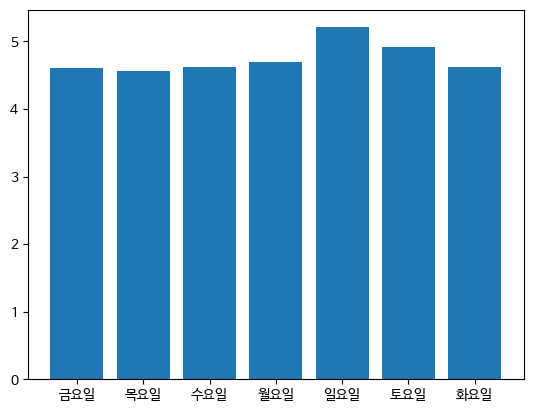

In [ ]:
# 요일별 평균 ECLO

weekday_stats = train_df.groupby('요일')['ECLO'].mean().reset_index()
plt.bar(weekday_stats['요일'], weekday_stats['ECLO'])

<Axes: xlabel='요일', ylabel='count'>

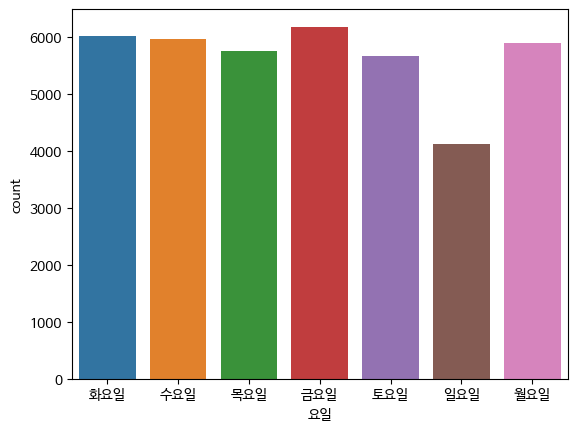

In [ ]:
sns.countplot(x="요일", data=train_df)  # 사고 빈도 자체는 주말이 적음 -> 주말에 발생한 사고들의 규모가 더 크다

In [ ]:
# 구별/요일별 평균 ECLO

weekday_gu_stats = train_df.groupby(['요일','구'])['ECLO'].mean().reset_index()
display(weekday_gu_stats.head())
display(weekday_gu_stats['구'].unique())

,요일,구,ECLO
0,금요일,남구,4.453333
1,금요일,달서구,4.582951
2,금요일,달성군,4.967391
3,금요일,동구,4.804213
4,금요일,북구,4.502361


array(['남구', '달서구', '달성군', '동구', '북구', '서구', '수성구', '중구'], dtype=object)

In [ ]:
import plotly.express as px

fig = px.line(weekday_gu_stats, x="요일", y="ECLO", color='구',markers=True)

fig.show()

<Axes: xlabel='구', ylabel='count'>

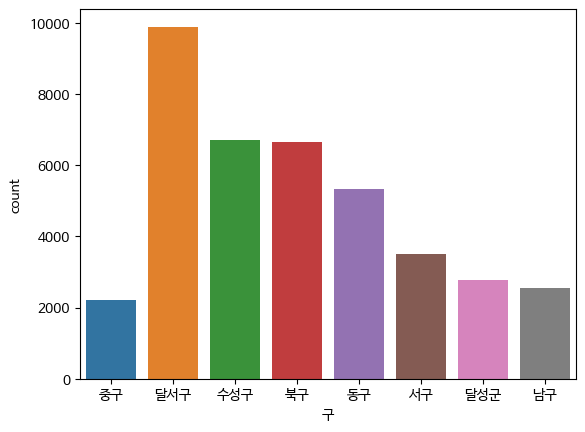

In [ ]:
sns.countplot(x="구", data=train_df)

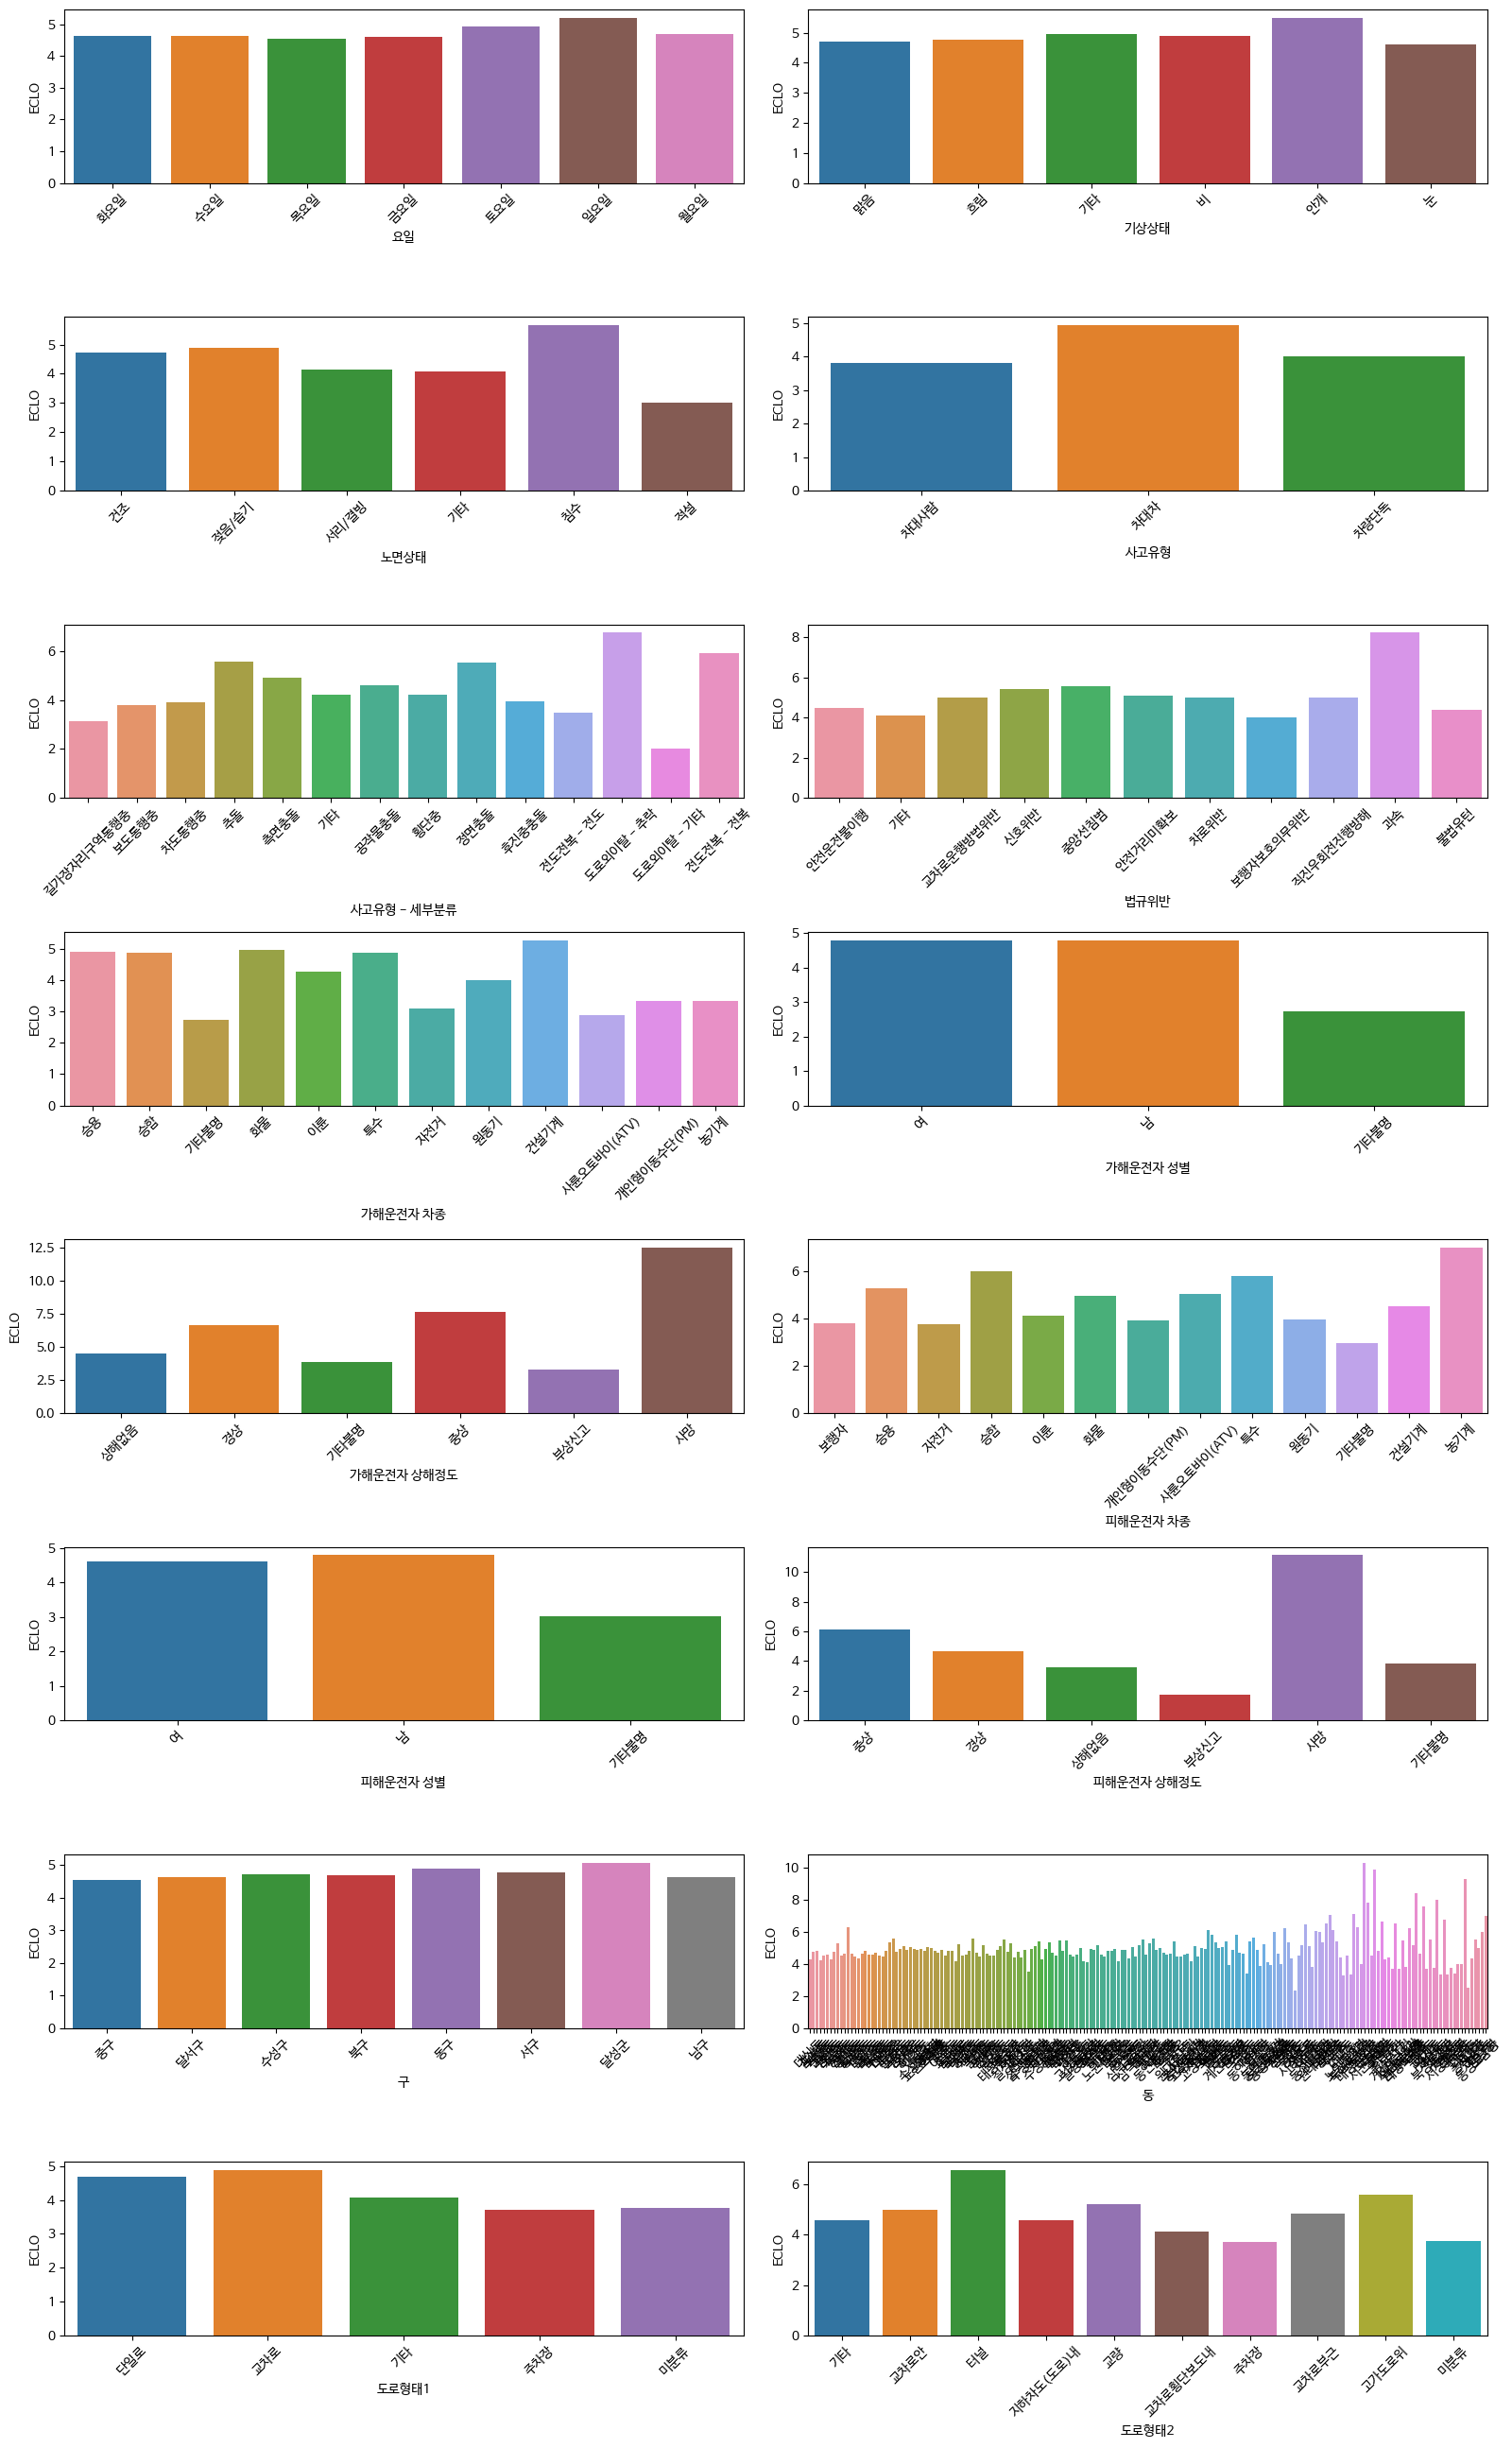

In [ ]:
i = 0
plt.figure(figsize=(16,26))
for col in ['요일', '기상상태', '노면상태', '사고유형', '사고유형 - 세부분류', '법규위반', '가해운전자 차종',
       '가해운전자 성별', '가해운전자 상해정도', '피해운전자 차종', '피해운전자 성별', '피해운전자 상해정도','구', '동', '도로형태1', '도로형태2']:
    i += 1
    plt.subplot(8,2,i)
    sns.barplot(x=train_df[col], y=train_df['ECLO'],ci=None)
    plt.xticks(rotation=45)
plt.tight_layout()

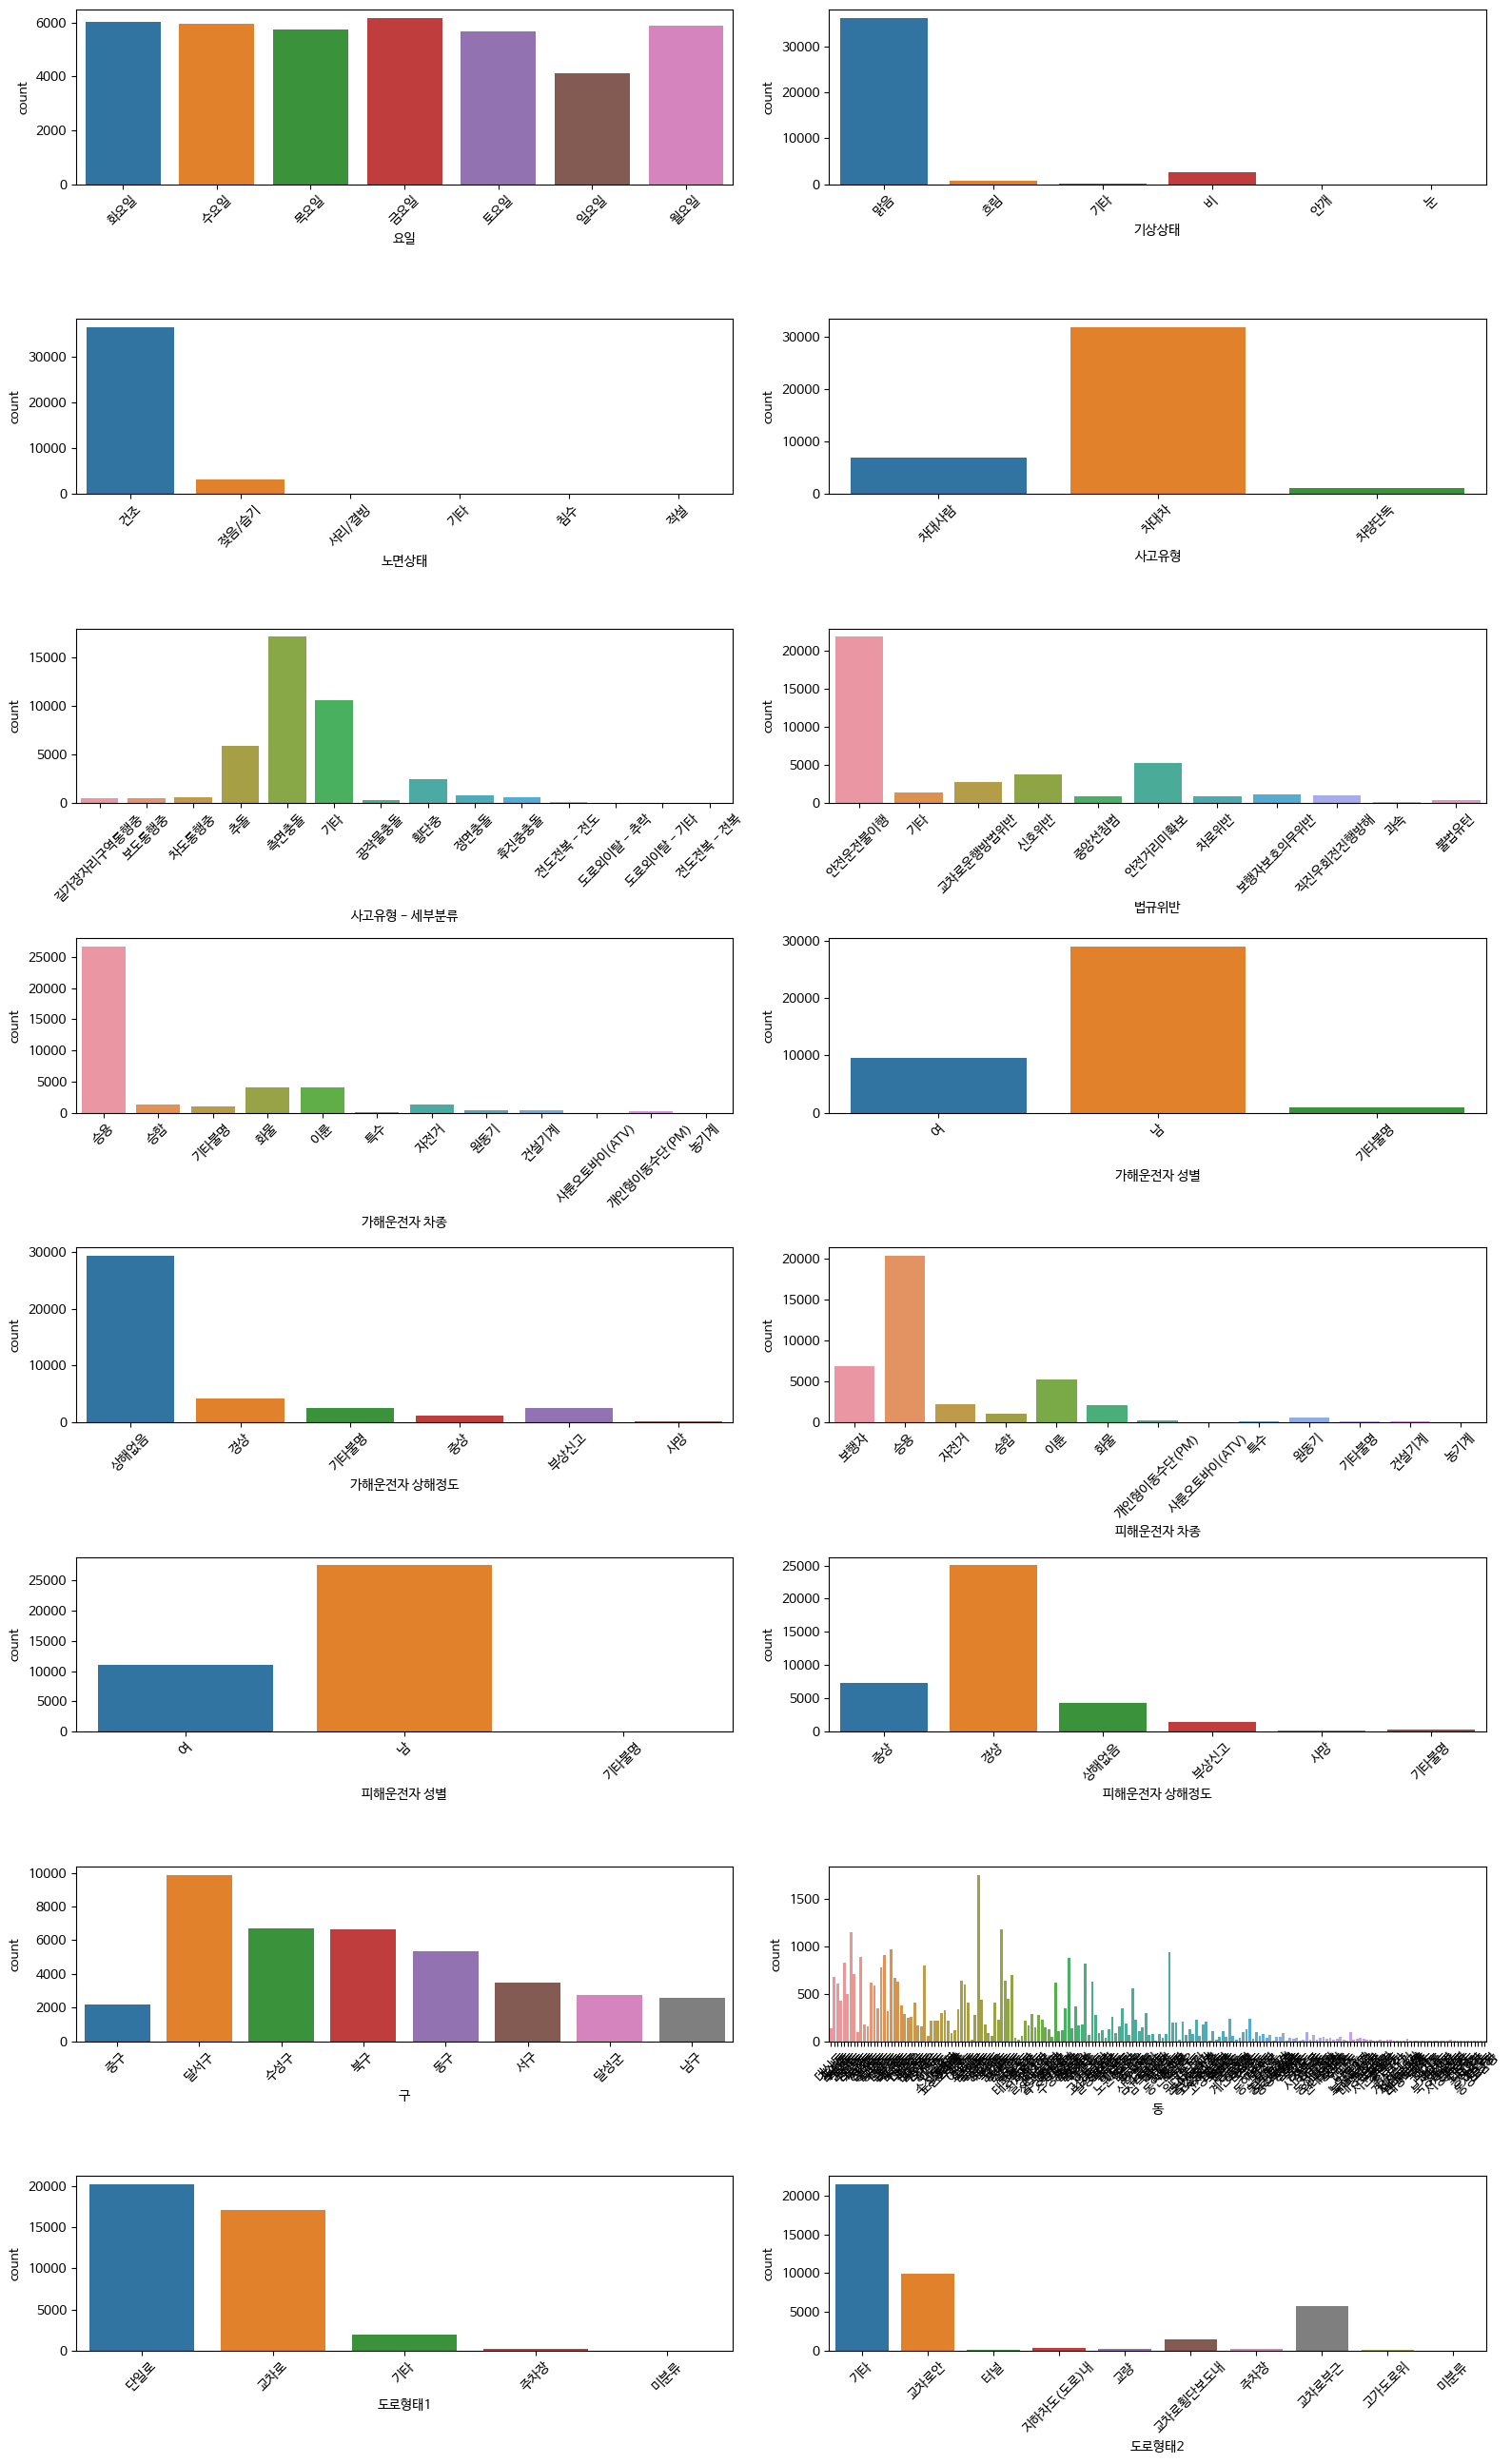

In [ ]:
i = 0
plt.figure(figsize=(16,26))
for col in ['요일', '기상상태', '노면상태', '사고유형', '사고유형 - 세부분류', '법규위반', '가해운전자 차종',
       '가해운전자 성별', '가해운전자 상해정도', '피해운전자 차종', '피해운전자 성별', '피해운전자 상해정도','구', '동', '도로형태1', '도로형태2']:
    i += 1
    plt.subplot(8,2,i)
    sns.countplot(x=train_df[col])
    plt.xticks(rotation=45)
plt.tight_layout()

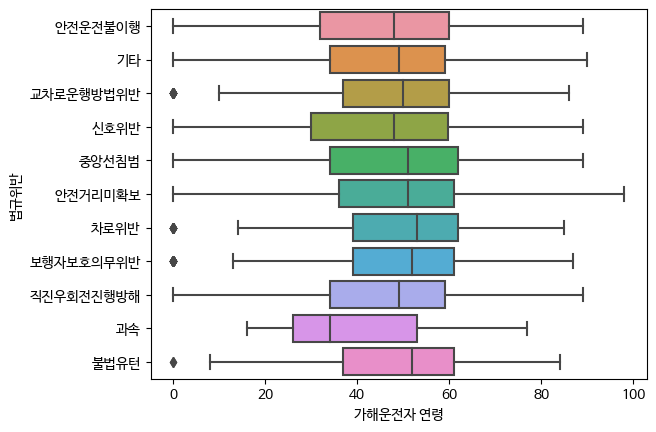

In [ ]:
sns.boxplot(data=train_df, y='법규위반', x='가해운전자 연령')
plt.show()

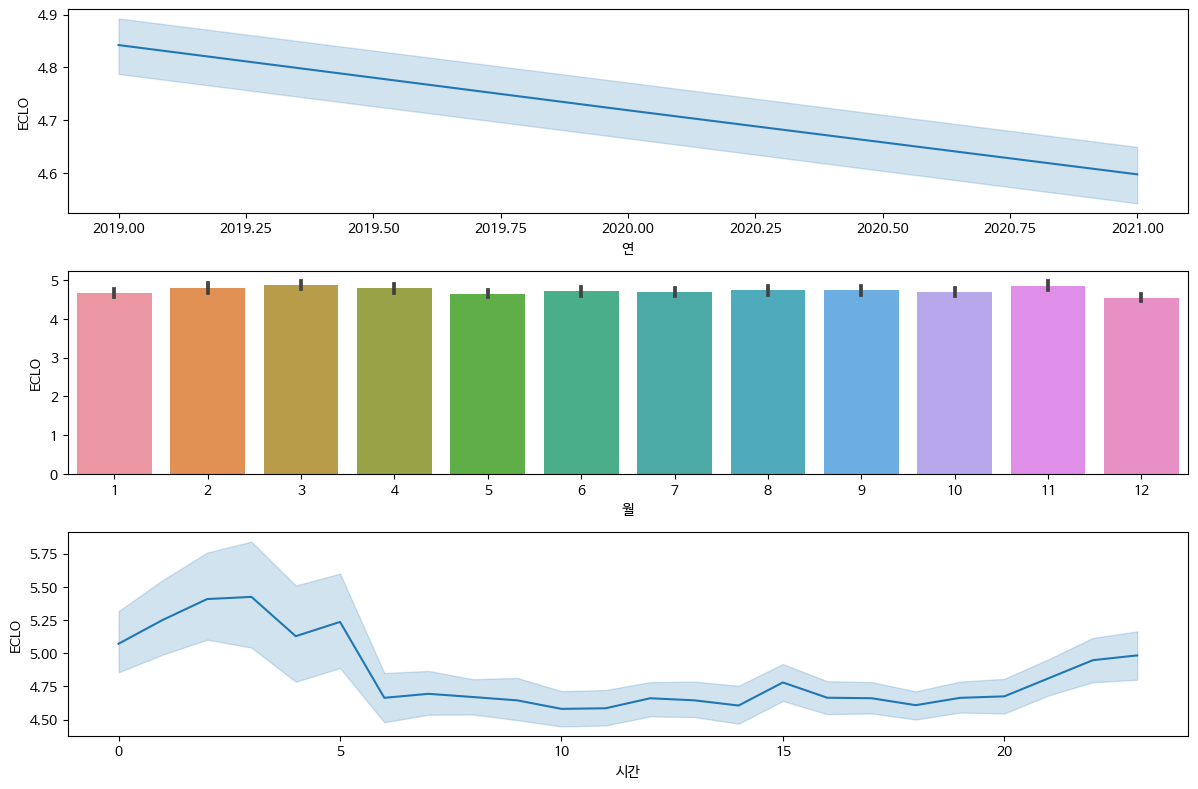

In [ ]:
plt.figure(figsize=(12,8))
plt.subplot(3,1,1)

sns.lineplot(data=train_df, x='연', y='ECLO') # 년도가 증가할수록 교통사고 줄어듬
plt.subplot(3,1,2)

sns.barplot(data=train_df, x='월', y='ECLO')  # 월별 ECLO차이 미미
plt.subplot(3,1,3)

sns.lineplot(data=train_df, x='시간', y='ECLO') # 새벽 시간대가 높음
plt.tight_layout();

In [ ]:
num_cols = train_df.select_dtypes(exclude='object').columns.tolist()
cat_cols = train_df.select_dtypes(include='object').columns.tolist()

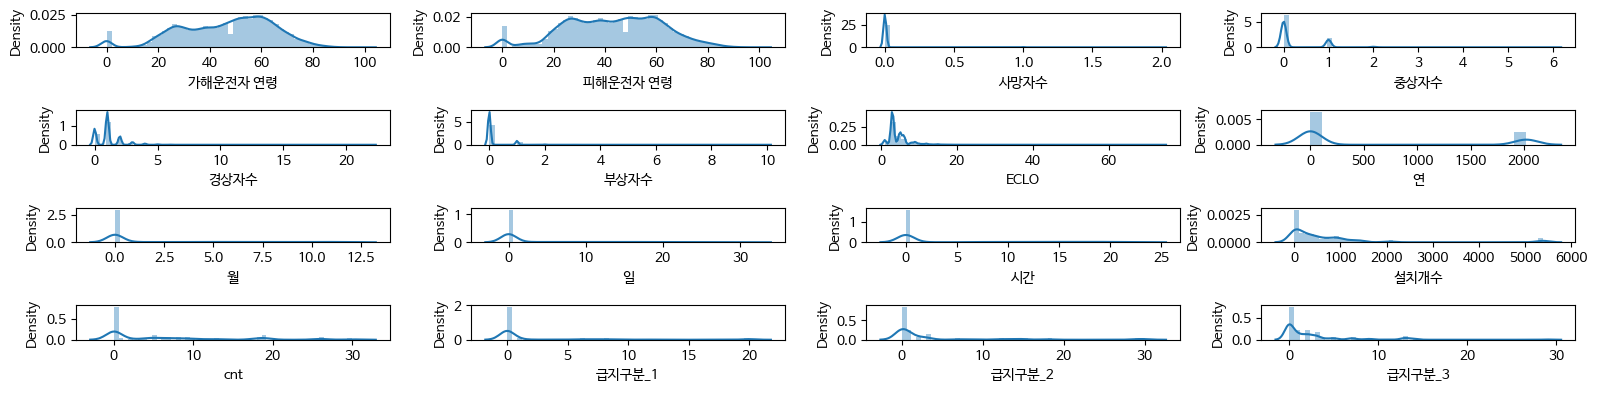

In [ ]:
i = 0
plt.figure(figsize=(16,4))
for col in num_cols:
    i += 1
    plt.subplot(4,4,i)
    sns.distplot(train_df[col])
plt.tight_layout()

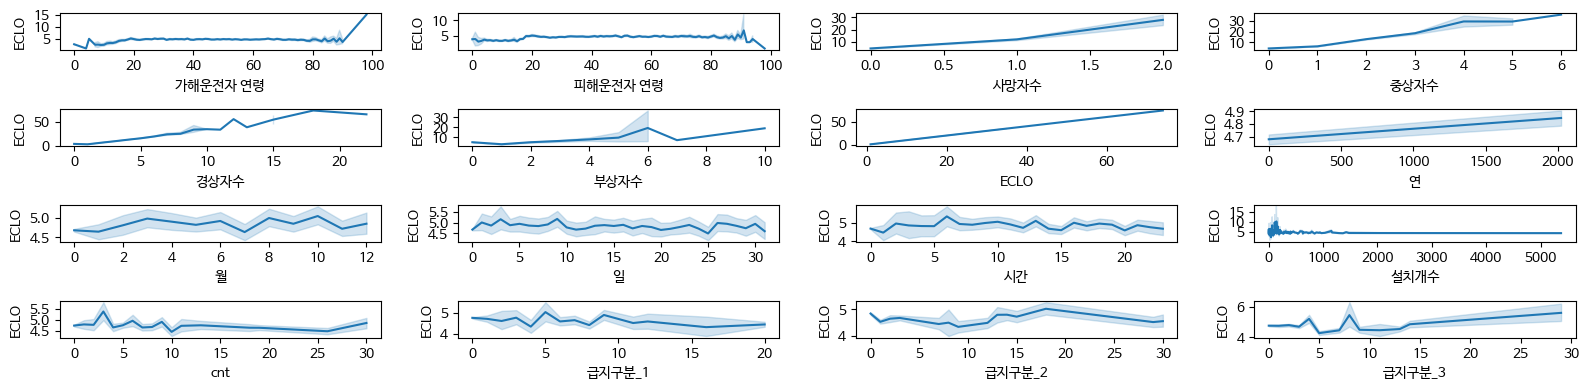

In [ ]:
i = 0
plt.figure(figsize=(16,4))
for col in num_cols:
    i += 1
    plt.subplot(4,4,i)
    sns.lineplot(data = train_df, x = col, y = 'ECLO')
plt.tight_layout()

<Axes: xlabel='cnt', ylabel='ECLO'>

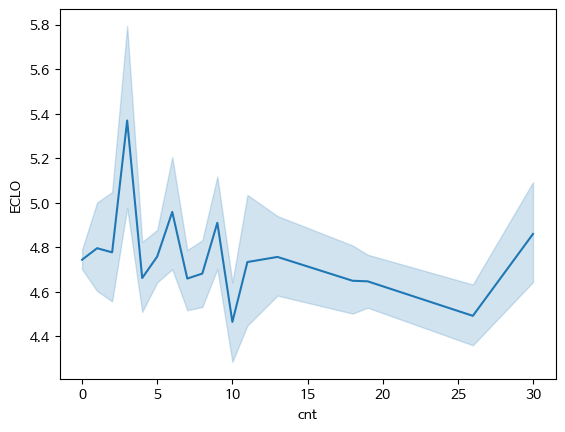

In [ ]:
sns.lineplot(data=train_df, x='cnt', y='ECLO')

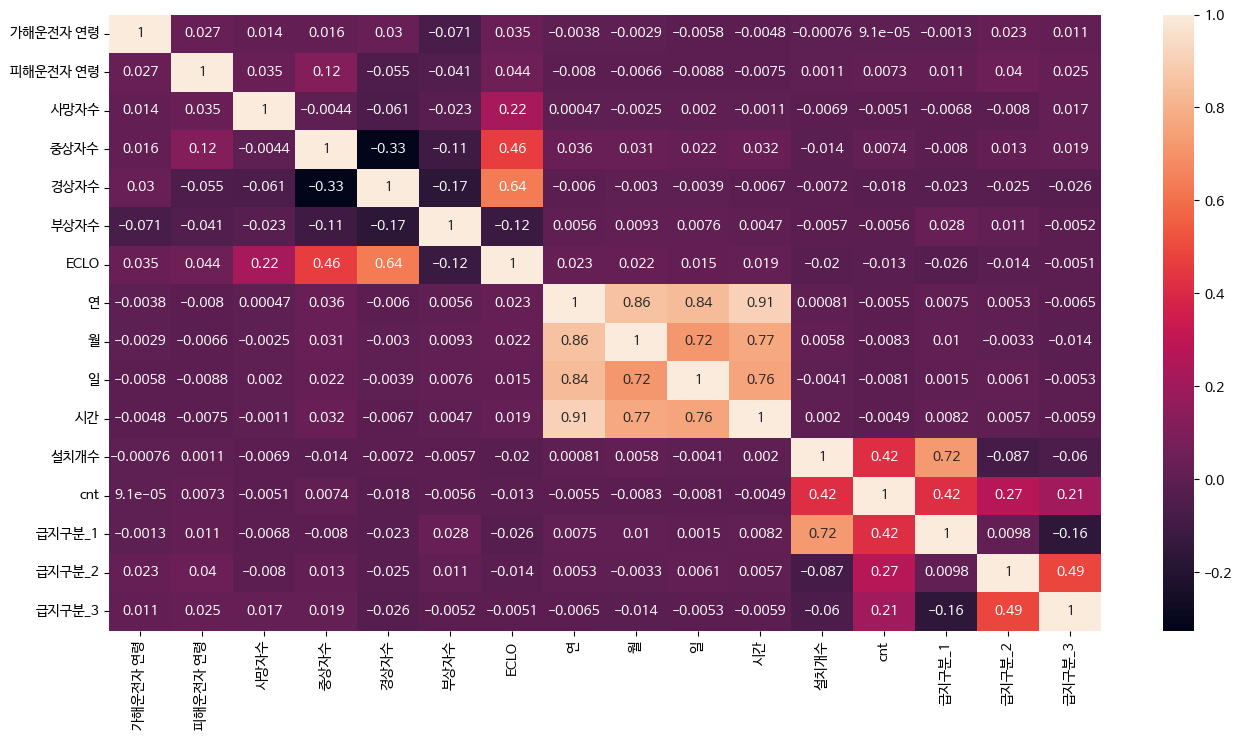

In [ ]:
plt.figure(figsize=(16,8))
sns.heatmap(train_df.corr(), annot=True);

In [ ]:
train_df.columns

Index(['ID', '요일', '기상상태', '노면상태', '사고유형', '사고유형 - 세부분류', '법규위반', '가해운전자 차종',
       '가해운전자 성별', '가해운전자 연령', '가해운전자 상해정도', '피해운전자 차종', '피해운전자 성별',
       '피해운전자 연령', '피해운전자 상해정도', '사망자수', '중상자수', '경상자수', '부상자수', 'ECLO', '연',
       '월', '일', '시간', '도시', '구', '동', '도로형태1', '도로형태2', '설치개수', 'cnt',
       '급지구분_1', '급지구분_2', '급지구분_3'],
      dtype='object')

## 모델링

In [ ]:
test_x = test_df.drop(columns=['ID']).copy()
train_x = train_df[test_x.columns].copy()
train_y = train_df['ECLO'].copy()

In [ ]:
train_x.shape, train_y.shape, test_x.shape

((39609, 18), (39609,), (10963, 18))

In [ ]:
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(train_x, train_y , test_size=0.2, random_state=0)
X_tr.shape, X_val.shape, y_tr.shape, y_val.shape

((31687, 18), (7922, 18), (31687,), (7922,))

In [ ]:
# random forest

from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(random_state=0)
model = rf.fit(X_tr,y_tr)
pred=model.predict(X_val)

from sklearn.metrics import mean_squared_log_error
def rmsle(y_true,y_pred):
    return mean_squared_log_error(y_true,y_pred) ** 0.5

rmsle(y_val,pred)

ValueError: ignored

In [ ]:
prediction = model.predict(test_x)

In [ ]:
# xgboost

from xgboost import XGBRegressor
xr = XGBRegressor(random_state=0)
xr.fit(X_tr,y_tr)
pred =xr.predict(X_val)

rmsle(y_val,pred)

0.47566473244154517

In [ ]:
# light GBM

from lightgbm.sklearn import LGBMRegressor


lgb_model = LGBMRegressor()
lgb_model.fit(X_tr, y_tr)
lgb_predictions = lgb_model.predict(X_val)

rmsle(y_val,lgb_predictions)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002542 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 506
[LightGBM] [Info] Number of data points in the train set: 31687, number of used features: 17
[LightGBM] [Info] Start training from score 4.731025


0.4619618422463004

In [ ]:
sample_submission = pd.read_csv("drive/MyDrive/ai4ml/open/sample_submission.csv")
baseline_submission = sample_submission.copy()
baseline_submission['ECLO'] = prediction
baseline_submission

,ID,ECLO
0,ACCIDENT_39609,5.62
1,ACCIDENT_39610,4.23
2,ACCIDENT_39611,6.62
3,ACCIDENT_39612,6.38
4,ACCIDENT_39613,5.01
...,...,...
10958,ACCIDENT_50567,8.18
10959,ACCIDENT_50568,7.62
10960,ACCIDENT_50569,8.72
10961,ACCIDENT_50570,8.09


In [ ]:
# baseline_submission.to_csv('drive/MyDrive/submit1.csv', index=False)